In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
# MNIST Image --> Tensors
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root="../Data", train=True, transform=transform)

In [6]:
test_data = datasets.MNIST(root="../Data", train=False, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True) # Len 600
test_loader = DataLoader(test_data, batch_size=500, shuffle=False) # Len 20

In [10]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_layer=784, output_layer=10, hidden_layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(input_layer, hidden_layers[0])
        self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.fc3 = nn.Linear(hidden_layers[1], output_layer)
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1) 
        return X

In [11]:
torch.manual_seed(101)
model = MultilayerPerceptron()

In [12]:
model
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
epochs = 10
train_corrects = []
test_corrects = []
for epoch in range(epochs):
    train_corr = 0
    test_corr = 0
    for b, (X_train, y_train) in enumerate(train_loader):
        if CUDA:
            X_train = X_train.cuda()
            y_train = y_train.cuda()
            
        y_pred = model(X_train.reshape(X_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        train_corr += (y_pred.argmax(1) == y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_corrects.append(train_corr.float() / len(train_data))
    
    print(f'Epoch [{epoch+1}/{epochs}]. Loss : {loss}. Accuracy {train_corr.float() / len(train_data) }')
    
    for t, (X_test, y_test) in enumerate(test_loader):
        if CUDA:
            X_test = X_test.cuda()
            y_test = y_test.cuda()
        with torch.no_grad():
            y_pred = model(X_test.reshape(X_test.shape[0], -1))
            test_corr += (y_pred.argmax(1) == y_test).sum()
    test_corrects.append(test_corr.float() / len(test_data))
    print(f'Epoch [{epoch+1}/{epochs}]. Test Accuracy : {test_corr.float() / len(test_data)}')

Epoch [1/10]. Loss : 0.21335367858409882. Accuracy 0.8938833475112915
Epoch [1/10]. Test Accuracy : 0.9437999725341797
Epoch [2/10]. Loss : 0.11907872557640076. Accuracy 0.954200029373169
Epoch [2/10]. Test Accuracy : 0.9629999995231628
Epoch [3/10]. Loss : 0.0992632657289505. Accuracy 0.9677333235740662
Epoch [3/10]. Test Accuracy : 0.9718999862670898
Epoch [4/10]. Loss : 0.045757293701171875. Accuracy 0.975600004196167
Epoch [4/10]. Test Accuracy : 0.9724999666213989
Epoch [5/10]. Loss : 0.13561569154262543. Accuracy 0.9800166487693787
Epoch [5/10]. Test Accuracy : 0.9739999771118164
Epoch [6/10]. Loss : 0.05420176684856415. Accuracy 0.983833372592926
Epoch [6/10]. Test Accuracy : 0.974399983882904
Epoch [7/10]. Loss : 0.07793308049440384. Accuracy 0.9869166612625122
Epoch [7/10]. Test Accuracy : 0.977400004863739
Epoch [8/10]. Loss : 0.05281431972980499. Accuracy 0.9891999959945679
Epoch [8/10]. Test Accuracy : 0.976699948310852
Epoch [9/10]. Loss : 0.006511249113827944. Accuracy 0.

In [15]:
torch.max(torch.tensor([[1,2,1],[4,2,1],[1,2,20],]),1)[1]

tensor([1, 0, 2])

In [18]:
len(train_data)

60000

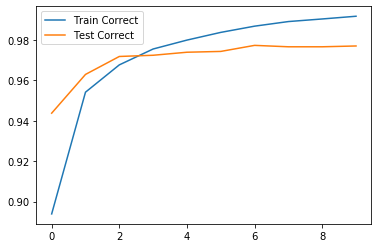

In [16]:
plt.plot(train_corrects, label="Train Correct")
plt.plot(test_corrects, label="Test Correct")
plt.legend()